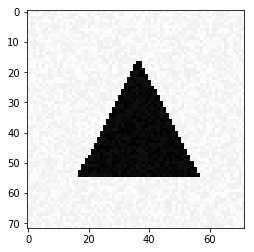

In [2]:
# function definition
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.cm as cm 

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]




# 3 Simple classification



In [3]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
import keras

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from keras.models import Sequential

In [5]:
from keras.layers import Dense, Activation

In [6]:
print(X_train.shape)

(300, 5184)


In [7]:
print(Y_train.shape) 
print(Y_train[0:3])

(300,)
[2. 0. 0.]


In [8]:
from keras.utils import np_utils 
Y_train = np_utils.to_categorical(Y_train, 3) 
print(Y_train[0])

[0. 0. 1.]


In [9]:
# SGD optimizer
from keras.optimizers import SGD
nb_neurons = 20 
model = Sequential([Dense(nb_neurons, input_shape=(5184,)), 
                    Activation('relu')])
model.add(Dense(nb_neurons, activation ='relu'))
model.add(Dense(nb_neurons, activation ='relu'))
model.add(Dense(nb_neurons, activation ='relu'))
model.add(Dense(3, activation ='softmax')) #softmax for last layer for classification problems
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(X_train, Y_train,epochs=20)
print(model.output_shape)

Epoch 1/20
300/300 [==============================] - 0s 1ms/step - loss: 0.2093
Epoch 2/20
300/300 [==============================] - 0s 173us/step - loss: 0.1730
Epoch 3/20
300/300 [==============================] - 0s 183us/step - loss: 0.1382
Epoch 4/20
300/300 [==============================] - 0s 156us/step - loss: 0.1135
Epoch 5/20
300/300 [==============================] - 0s 163us/step - loss: 0.1102
Epoch 6/20
300/300 [==============================] - 0s 170us/step - loss: 0.0925
Epoch 7/20
300/300 [==============================] - 0s 163us/step - loss: 0.0947
Epoch 8/20
300/300 [==============================] - 0s 156us/step - loss: 0.0771
Epoch 9/20
300/300 [==============================] - 0s 153us/step - loss: 0.0694
Epoch 10/20
300/300 [==============================] - 0s 189us/step - loss: 0.0551
Epoch 11/20
300/300 [==============================] - 0s 176us/step - loss: 0.0642
Epoch 12/20
300/300 [==============================] - 0s 236us/step - loss: 0.0527
Epo

In [10]:
X_test = generate_a_disk() 
X_test = X_test.reshape(1, X_test.shape[0]) 
model.predict(X_test)



array([[0., 1., 0.]], dtype=float32)

In [11]:
X_test = generate_a_rectangle() 
X_test = X_test.reshape(1, X_test.shape[0]) 
model.predict(X_test)

array([[3.859277e-06, 9.999962e-01, 0.000000e+00]], dtype=float32)

In [12]:
# Adam optimizer
from keras.optimizers import Adam
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, 
            epsilon=None, 
            decay=0.0, 
            amsgrad=False)

In [13]:
nb_neurons = 20
model_A = Sequential([Dense(nb_neurons), 
                    Activation('relu')])
model_A.add(Dense(nb_neurons, activation='relu'))
model_A.add(Dense(nb_neurons, activation='relu'))
model_A.add(Dense(nb_neurons, activation='relu'))
model_A.add(Dense(3, activation ='softmax'))

model_A.compile(loss='mean_squared_error', optimizer=adam)
model_A.fit(X_train, Y_train,epochs=20, batch_size = 32)
print(model.output_shape)
# looks like adam optimizer converges more slowly
# loss function decreases slowly

Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 0.2316
Epoch 2/20
300/300 [==============================] - 0s 273us/step - loss: 0.2072
Epoch 3/20
300/300 [==============================] - 0s 246us/step - loss: 0.1827
Epoch 4/20
300/300 [==============================] - 0s 263us/step - loss: 0.1560
Epoch 5/20
300/300 [==============================] - 0s 246us/step - loss: 0.1319
Epoch 6/20
300/300 [==============================] - 0s 226us/step - loss: 0.1173
Epoch 7/20
300/300 [==============================] - 0s 269us/step - loss: 0.1079
Epoch 8/20
300/300 [==============================] - 0s 246us/step - loss: 0.0926
Epoch 9/20
300/300 [==============================] - 0s 269us/step - loss: 0.0817
Epoch 10/20
300/300 [==============================] - 0s 206us/step - loss: 0.0708
Epoch 11/20
300/300 [==============================] - 0s 253us/step - loss: 0.0575
Epoch 12/20
300/300 [==============================] - 0s 226us/step - loss: 0.0463
Epo

In [14]:
X_test = generate_a_disk() 
X_test = X_test.reshape(1, X_test.shape[0]) 
model_A.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

In [15]:
X_test = generate_a_rectangle() 
X_test = X_test.reshape(1, X_test.shape[0]) 
model_A.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

# 4 Visualization of the Solution

In [16]:
model.get_weights()

[array([[ 0.01399912, -0.02514562,  0.01415186, ..., -0.02607337,
         -0.00962554, -0.00324709],
        [ 0.02725965,  0.03026386, -0.01884223, ..., -0.0054867 ,
          0.03025042,  0.01197026],
        [-0.01047437, -0.00751   , -0.01002556, ...,  0.03175775,
          0.01426344, -0.00397048],
        ...,
        [-0.01490724,  0.01126152,  0.00722938, ..., -0.00154921,
         -0.0249452 ,  0.01817229],
        [-0.03309375,  0.00343531, -0.01934432, ..., -0.00336288,
         -0.02040458,  0.02549145],
        [ 0.01354894, -0.02706395, -0.0122285 , ...,  0.0144871 ,
         -0.02843103,  0.01799215]], dtype=float32),
 array([ 0.        ,  0.        ,  0.00080521, -0.00072654,  0.00089817,
         0.        ,  0.00294274,  0.        ,  0.00043051, -0.00080673,
         0.00144556,  0.00083964, -0.00049572,  0.00166194,  0.00168784,
        -0.00017782,  0.00096824,  0.00130542,  0.        ,  0.00074889],
       dtype=float32),
 array([[-3.58724833e-01, -3.14653397e-01,

In [17]:
weights = model.get_weights()

In [18]:
# I checked the shape
for w in weights:
    print(w.shape)

(5184, 20)
(20,)
(20, 20)
(20,)
(20, 20)
(20,)
(20, 20)
(20,)
(20, 3)
(3,)


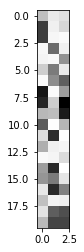

In [19]:
weights_A = model_A.get_weights()
image_A = weights_A[-2]
image = weights[-2]
plt.imshow(image_A, cmap = cm.Greys)
# here I visualise the last layer weights (for each model I have 20 nodes, and three classes in last layer)

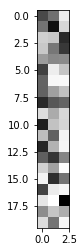

In [20]:
plt.imshow(image, cmap = cm.Greys)


# 5 more difficult Classification problem

In [21]:

[X_train, Y_train] = generate_dataset_classification(300, 20, True)
[X_test, Y_test] = generate_test_set_classification()
Y_train = np_utils.to_categorical(Y_train, 3)
X_train.shape

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


(300, 5184)

In [22]:
# I used the variable in order to be able to tune this number in each layer
nb_neurons = 20 
model_A_1 = Sequential([Dense(nb_neurons), 
                    Activation('relu')])
model_A_1.add(Dense(nb_neurons, activation='relu'))
model_A_1.add(Dense(nb_neurons, activation='relu'))
model_A_1.add(Dense(nb_neurons, activation='relu'))
model_A_1.add(Dense(3, activation ='softmax'))
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, 
            epsilon=None, 
            decay=0.0, 
            amsgrad=False)
model_A_1.compile(loss='mean_squared_error', optimizer=adam, metrics = ['accuracy'])
model_A_1.fit(X_train, Y_train,epochs=10, batch_size = 32)


Epoch 1/10
300/300 [==============================] - 0s 2ms/step - loss: 0.2313 - acc: 0.3200
Epoch 2/10
300/300 [==============================] - 0s 229us/step - loss: 0.2259 - acc: 0.3733
Epoch 3/10
300/300 [==============================] - 0s 206us/step - loss: 0.2229 - acc: 0.4667
Epoch 4/10
300/300 [==============================] - 0s 233us/step - loss: 0.2167 - acc: 0.4600
Epoch 5/10
300/300 [==============================] - 0s 206us/step - loss: 0.2163 - acc: 0.4567
Epoch 6/10
300/300 [==============================] - 0s 226us/step - loss: 0.2263 - acc: 0.3733
Epoch 7/10
300/300 [==============================] - 0s 193us/step - loss: 0.2313 - acc: 0.3767
Epoch 8/10
300/300 [==============================] - 0s 183us/step - loss: 0.2168 - acc: 0.4100
Epoch 9/10
300/300 [==============================] - 0s 406us/step - loss: 0.2131 - acc: 0.4133
Epoch 10/10
300/300 [==============================] - 0s 229us/step - loss: 0.2056 - acc: 0.4400


In [23]:
model_A_1.evaluate(X_test, Y_test)


300/300 [==============================] - 0s 349us/step


[0.2127932757139206, 0.4066666666666667]

In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Conv1D, BatchNormalization
X_train = X_train.reshape(X_train.shape[0],72,72,1)
X_test = X_test.reshape(X_test.shape[0],72,72,1)

In [25]:
# I followed the hint in the assigment
from keras.layers import Dropout
model_c = Sequential()
model_c.add(Conv2D(16, kernel_size=(5,5),input_shape = (72,72,1)))
model_c.add(MaxPooling2D(pool_size=(4, 4)))
model_c.add(Flatten())
model_c.add(Dense(3, activation ='softmax'))

In [26]:
model_c.compile(loss='categorical_crossentropy', optimizer=adam, 
                metrics = ['accuracy'])


In [27]:
model_c.fit(X_train, Y_train, epochs=20, batch_size = 32)
# on more difficult image recognition problem, simpler convolutional network performs better than complicated sequntial with only
# fully-connected layers


Epoch 1/20
300/300 [==============================] - 1s 4ms/step - loss: 1.1479 - acc: 0.3833
Epoch 2/20
300/300 [==============================] - 1s 3ms/step - loss: 1.0965 - acc: 0.3933
Epoch 3/20
300/300 [==============================] - 1s 3ms/step - loss: 0.9678 - acc: 0.4933
Epoch 4/20
300/300 [==============================] - 1s 3ms/step - loss: 0.8861 - acc: 0.6600
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.8131 - acc: 0.7100
Epoch 6/20
300/300 [==============================] - 1s 3ms/step - loss: 0.7794 - acc: 0.6667
Epoch 7/20
300/300 [==============================] - 1s 3ms/step - loss: 0.7221 - acc: 0.7500
Epoch 8/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6862 - acc: 0.7467
Epoch 9/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6626 - acc: 0.7767
Epoch 10/20
300/300 [==============================] - 1s 3ms/step - loss: 0.6710 - acc: 0.7100
Epoch 11/20
300/300 [============================

In [28]:
model_c.evaluate(X_test, Y_test)
# loss function is high but accuracy is also higher in this model

300/300 [==============================] - 1s 2ms/step


[0.6982684930165609, 0.7199999992052714]

# 6 regression model

In [29]:

[X_train, Y_train] = generate_dataset_regression(300, 20)
[X_test, Y_test] = generate_test_set_regression()
# unfortunately, I did not manage to normalize Y and the performance of the regression network is quite poor

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [30]:
# I started with network with fully connected layers
nb_neurons=50
model_regression = Sequential()
model_regression.add(BatchNormalization())
model_regression.add(Dense(nb_neurons,activation = 'relu', input_shape = (5184,))) 
                    
model_regression.add(Dense(nb_neurons, activation='relu'))
model_regression.add(Dense(nb_neurons, activation='relu'))
model_regression.add(Dense(nb_neurons, activation='relu'))
model_regression.add(Dense(nb_neurons, activation='relu'))
model_regression.add(Dense(6, activation='relu'))
model_regression.compile(loss='mean_squared_error', 
                         optimizer=sgd)

In [31]:
model_regression.fit(X_train, Y_train,epochs = 10, batch_size = 32)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2341
Epoch 2/10
300/300 [==============================] - 0s 542us/step - loss: 0.1553
Epoch 3/10
300/300 [==============================] - 0s 459us/step - loss: 0.1116
Epoch 4/10
300/300 [==============================] - 0s 489us/step - loss: 0.0759
Epoch 5/10
300/300 [==============================] - 0s 765us/step - loss: 0.0647
Epoch 6/10
300/300 [==============================] - 0s 495us/step - loss: 0.0562
Epoch 7/10
300/300 [==============================] - 0s 519us/step - loss: 0.0501
Epoch 8/10
300/300 [==============================] - 0s 522us/step - loss: 0.0457
Epoch 9/10
300/300 [==============================] - 0s 482us/step - loss: 0.0427
Epoch 10/10
300/300 [==============================] - 0s 462us/step - loss: 0.0393


In [32]:
prediction=model_regression.predict(X_train)

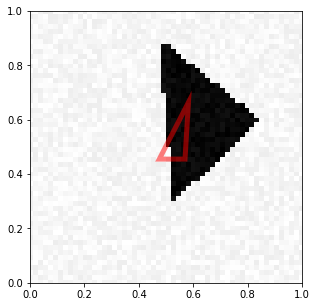

In [33]:
visualize_prediction(X_train[10], prediction[10])

In [34]:
X_train = X_train.reshape(X_train.shape[0],72,72,1)
X_test = X_test.reshape(X_test.shape[0],72,72,1)

In [35]:
model_regression = Sequential()
model_regression.add(BatchNormalization())
model_regression.add(Conv2D(32, kernel_size=(5,5), input_shape = (72,72,1)))
model_regression.add(MaxPooling2D(pool_size=(4, 4)))
model_regression.add(Conv2D(64, kernel_size=(5,5)))
model_regression.add(MaxPooling2D(pool_size=(2, 2)))
model_regression.add(Conv2D(128, kernel_size=(5,5)))
model_regression.add(MaxPooling2D(pool_size=(1, 1)))
model_regression.add(Flatten())
model_regression.add(BatchNormalization())
model_regression.add(Dense(20, activation ='relu'))
model_regression.add(Dense(20, activation ='relu'))
model_regression.add(Dense(20, activation ='relu'))
model_regression.add(Dense(6, activation ='relu'))
model_regression.compile(loss='mean_squared_error', optimizer=sgd)
model_regression.fit(X_train, Y_train, epochs = 25)
# I tried to overcome the problem of abscence of normalization by increasing the compexity of network, but it did not work well

Epoch 1/25
300/300 [==============================] - 8s 25ms/step - loss: 0.2217
Epoch 2/25
300/300 [==============================] - 6s 19ms/step - loss: 0.1602
Epoch 3/25
300/300 [==============================] - 6s 19ms/step - loss: 0.1325
Epoch 4/25
300/300 [==============================] - 6s 21ms/step - loss: 0.0990
Epoch 5/25
300/300 [==============================] - 6s 20ms/step - loss: 0.0776
Epoch 6/25
300/300 [==============================] - 6s 20ms/step - loss: 0.0672
Epoch 7/25
300/300 [==============================] - 6s 20ms/step - loss: 0.0633
Epoch 8/25
300/300 [==============================] - 6s 20ms/step - loss: 0.0600
Epoch 9/25
300/300 [==============================] - 6s 21ms/step - loss: 0.0555
Epoch 10/25
300/300 [==============================] - 6s 20ms/step - loss: 0.0540
Epoch 11/25
300/300 [==============================] - 6s 21ms/step - loss: 0.0500
Epoch 12/25
300/300 [==============================] - 7s 24ms/step - loss: 0.0485
Epoch 13/25
3

In [36]:
prediction=model_regression.predict(X_train)

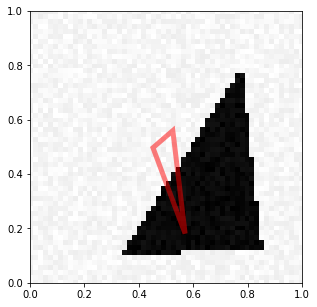

In [37]:
visualize_prediction(X_train[210], prediction[210])

In [38]:
model_regression.evaluate(X_test, Y_test)

300/300 [==============================] - 1s 3ms/step


0.07957050889730453

# 7 image denosing

In [39]:

# I modified last function adding noise 100
randy = 100
def generate_dataset_classification_with_noise(nb_samples, noise=randy, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    X_with_noise = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X_with_noise[i] = generate_a_rectangle(noise, free_location)
            X[i] = generate_a_rectangle(free_location)
        elif category == 1: 
            X[i] = generate_a_disk(free_location)
            X_with_noise[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(free_location)
            [X_with_noise[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X= (X) / (255)
    X_with_noize= (X_with_noise + noise) / (255 + 2 * noise)
    return [X, X_with_noize, Y]



In [40]:
[X,X_with_noise,Y]=generate_dataset_classification_with_noise(300)
X = X.reshape(X.shape[0],72,72,1)
X_with_noise = X_with_noise.reshape(X_with_noise.shape[0],72,72,1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


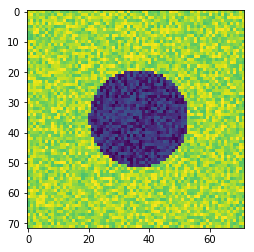

In [41]:
plt.imshow(X_with_noise[20].reshape(72,72)) # check the noise generation

In [42]:
from keras.layers import UpSampling2D
# I tried several different paramters probably, I have built too complicated network, using the pattern from the 
# the lectures, but accuracy of the loss is quite low
model_C_1 = Sequential()
model_C_1.add(Conv2D(32, kernel_size = 3, activation='relu', 
                     input_shape=(72,72,1), 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(Conv2D(32, kernel_size = 3, activation='relu', 
                     input_shape=(72,72,1), 
                     padding='same'))
model_C_1.add(MaxPooling2D((2), padding = 'same'))
model_C_1.add(Conv2D(64, kernel_size = 3, 
                     activation='relu', 
                     input_shape=(72,72,1),
                     batch_size = 32, 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(Conv2D(64, kernel_size = 3, 
                     activation='relu', 
                     input_shape=(72,72,1),
                     batch_size = 32, 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(MaxPooling2D((2), 
                           padding = 'same'))
model_C_1.add(Conv2D(128, 
                     kernel_size = 3, 
                     activation='relu',
                     input_shape=(72,72,1),
                     batch_size =32, 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(Conv2D(128, 
                     kernel_size = 3, 
                     activation='relu',
                     input_shape=(72,72,1),
                     batch_size =32, 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(MaxPooling2D((2), 
                           padding = 'same'))
model_C_1.add(UpSampling2D(size = (2,2)))
model_C_1.add(Conv2D(128, 
                     kernel_size = 2, 
                     activation='relu', 
                     batch_size =32, 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(Conv2D(128, 
                     kernel_size = 3, 
                     activation='relu', 
                     batch_size =32, 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(UpSampling2D(size = (2,2)))
model_C_1.add(Conv2D(64, 
                     kernel_size = 2, 
                     activation='relu', 
                     batch_size =32, 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(Conv2D(64, 
                     kernel_size = 3, 
                     activation='relu', 
                     batch_size =32, 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(UpSampling2D(size = (2,2)))
model_C_1.add(Conv2D(32, 
                     kernel_size = 2, 
                     activation='relu', 
                     batch_size =32, 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(Conv2D(32, 
                     kernel_size = 3, 
                     activation='relu', 
                     batch_size =32, 
                     padding='same'))
model_C_1.add(BatchNormalization())
model_C_1.add(Conv2D(1, 
                     kernel_size = 3, 
                     activation='softmax', 
                     batch_size =32, 
                     padding='same'))

model_C_1.compile(loss='mean_squared_error', optimizer=adam, 
                metrics = ['accuracy'])

In [43]:
model_C_1.fit(X_with_noise,X, epochs = 10)

Epoch 1/10
300/300 [==============================] - 88s 292ms/step - loss: 0.2226 - acc: 0.7774
Epoch 2/10
300/300 [==============================] - 81s 271ms/step - loss: 0.2226 - acc: 0.7774
Epoch 3/10
300/300 [==============================] - 82s 274ms/step - loss: 0.2226 - acc: 0.7774
Epoch 4/10
300/300 [==============================] - 81s 271ms/step - loss: 0.2226 - acc: 0.7774
Epoch 5/10
300/300 [==============================] - 81s 271ms/step - loss: 0.2226 - acc: 0.7774
Epoch 6/10
300/300 [==============================] - 83s 275ms/step - loss: 0.2226 - acc: 0.7774
Epoch 7/10
300/300 [==============================] - 84s 281ms/step - loss: 0.2226 - acc: 0.7774
Epoch 8/10
300/300 [==============================] - 81s 270ms/step - loss: 0.2226 - acc: 0.7774
Epoch 9/10
300/300 [==============================] - 82s 273ms/step - loss: 0.2226 - acc: 0.7774
Epoch 10/10
300/300 [==============================] - 81s 271ms/step - loss: 0.2226 - acc: 0.7774
